In [14]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from PIL import Image

from dataset_utils import load_dataset

In [3]:
dataset = "flickr30k"
img_paths, img_ids, captions, label_strs, train_ids, val_ids, test_ids, label_names = load_dataset(dataset)

Num images without label:  104
Median:  6.0


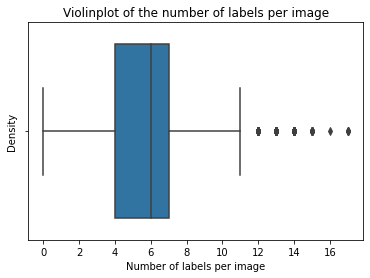

In [8]:
labels_per_img = np.array([len(labels) for labels in label_strs])
sns.boxplot(x=(labels_per_img))
#sns.boxplot(x=np.log10(labels_per_img))
#sns.violinplot(x=labels_per_img)
plt.xticks(range(0, max(labels_per_img) + 1, 2))



p = plt.title("Violinplot of the number of labels per image")
plt.xlabel("Number of labels per image")
plt.ylabel("Density")
print("Num images without label: ", len(labels_per_img[labels_per_img == 0]))
print("Median: ", np.median(labels_per_img))

plt.savefig(os.path.join(dataset, f"labels_per_img.pdf"), dpi=300)

/srv/home/8wiehe/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


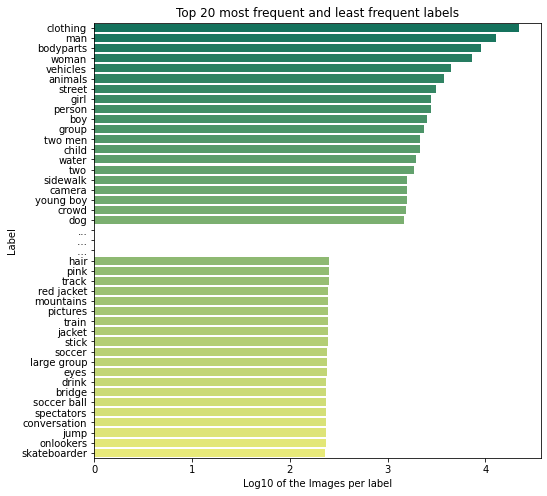

In [11]:
from collections import defaultdict

imgs_per_label = defaultdict(int)
for img_labels in label_strs:
    for l in set(img_labels):
        imgs_per_label[l] += 1
imgs_per_label_df = pd.Series(list(imgs_per_label.values()), index=list(imgs_per_label.keys()))
imgs_per_label_df = imgs_per_label_df.sort_values(ascending=False)

show_df = pd.concat([imgs_per_label_df.iloc[:20], pd.Series([0, 0, 0], index=["...", " ...", "  ..."]), imgs_per_label_df.iloc[-20:]], axis=0)
show_df = np.log10(show_df)
#show_df = np.ln(show_df)
plt.figure(figsize=(8, 8))
sns.barplot(x=show_df, y= show_df.index, palette="summer")
plt.title("Top 20 most frequent and least frequent labels")
plt.xlabel("Log10 of the Images per label")
plt.ylabel("Label")
plt.savefig(os.path.join(dataset, f"imgs_per_label.pdf"), dpi=300)
plt.show()

In [12]:
captions_per_img = len(captions) // len(img_paths)
captions_per_img

5

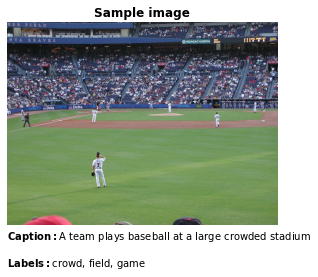

In [15]:
# show qualitative data
idx = 3
caption_idx = idx * captions_per_img

img = Image.open(img_paths[idx])
fig = plt.figure()
p = plt.imshow(img)
plt.axis("off")
plt.title("Sample image", fontweight="bold")
plt.text(0, 400, r"$\bf{Caption: }$" + captions["caption_text"].iloc[caption_idx].strip(".").strip())
plt.text(0, 450, r"$\bf{Labels: }$" + ", ".join(label_strs[idx]))
plt.tight_layout()
plt.savefig(os.path.join(dataset, f"sample_{idx}.pdf"), dpi=300)

45310675
['A woman is pushing a cart with luggage down a street .', 'A man in a hat and green shirt is pushing luggage on a blue cart .', 'Old man using an improvised broken wheel barrel to transport his tools for work .', 'A man , dressed in a green shirt with black pants , is transporting luggage strapped to a wheelbarrow , down a cobblestone road .', 'A gentleman in a green shirt , brown pants , black boots pushing a wheelbarrow with his suitcase and some other personal belongings on top of it down a bumpy rock road .']


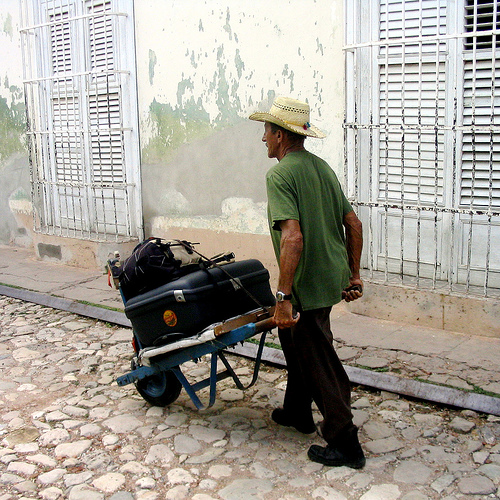

In [17]:
def get_data(img_idx, return_img=False):
    img_name = img_ids[img_idx]
    img_captions = [captions.iloc[img_idx * 5 + i]["caption_text"] for i in range(5)]
    img = Image.open(img_paths[img_idx]) if return_img else img_paths[img_idx]
    return img_name, img_captions, img

test = 1
if test:
    img_idx = 666

    img_name, img_captions, img = get_data(img_idx, return_img=True)
    print(img_name)
    print(img_captions)
    img.show()